# PARKINSON DATA

##### IMPORTING MODELS

In [1]:
### importing models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

#### IMPORTING DATASET

In [2]:
### importing dataset
Parkinson_data=pd.read_csv('parkinson_data.csv')
Parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
### looking at the various columns of the dataset
Parkinson_data.columns 

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
### viewing variuos information about the dataset
Parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Each column does not have a empty row, they are all filled 

In [5]:
### checking for duplicates
Parkinson_data['name'].value_counts()               

phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: name, Length: 195, dtype: int64

Each name is unique for every person

## UNIVARIATE ANALYSIS

In [6]:
### looding dataset for UNIVARIATE ANALYSIS 
Parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### NAME

In [7]:
### There were no duplicates in the patient name 
Parkinson_data['name'].unique

<bound method Series.unique of 0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_5
            ...      
190    phon_R01_S50_2
191    phon_R01_S50_3
192    phon_R01_S50_4
193    phon_R01_S50_5
194    phon_R01_S50_6
Name: name, Length: 195, dtype: object>

In [8]:
### Each bame is unique for every patient
Parkinson_data['name'].value_counts()

phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: name, Length: 195, dtype: int64

### MDVP:Fo(Hz) (Average vocal  Fundamental Frequency)

In [9]:
### various rows of the MDVP:Fo(Hz) column
Parkinson_data['MDVP:Fo(Hz)'].head()

0    119.992
1    122.400
2    116.682
3    116.676
4    116.014
Name: MDVP:Fo(Hz), dtype: float64

In [10]:
### the highest MDVP:Fo(Hz) value
Parkinson_data['MDVP:Fo(Hz)'].max()

260.105

260.105Hz is the highest recorded value for MDVP:Fo(Hz) (Average vocal Fundamental Frequency)

In [11]:
### average MDVP:Fo(Hz) value
Parkinson_data['MDVP:Fo(Hz)'].mean()

154.22864102564105

Most patients recorded 154.22864102564105Hz for MDVP:Fo(Hz) (Average vocal Fundamental Frequency)


In [12]:
### the smallest MDVP:Fo(Hz) value
Parkinson_data['MDVP:Fo(Hz)'].min()

88.333

88.333Hz is the lowest value recorded for  MDVP:Fo(Hz) (Average vocal Fundamental Frequency)

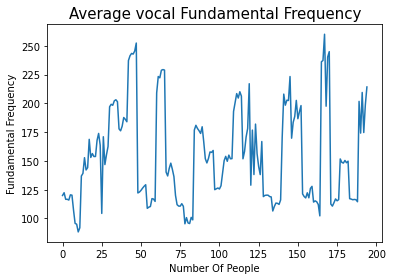

In [13]:
### plotting a graph for MDVP:Fo(Hz) column
plt.plot(Parkinson_data['MDVP:Fo(Hz)'])
plt.title('Average vocal Fundamental Frequency',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Fundamental Frequency',fontsize=10)
plt.show()

This means that all of the patients  have a normal vocal frequency no one has a deep voice 

### MDVP:Fhi(Hz) (Maximum vocal Fundamental Frequency)

In [14]:
### various rows of the MDVP:Fhi(Hz) column
Parkinson_data['MDVP:Fhi(Hz)'].head()

0    157.302
1    148.650
2    131.111
3    137.871
4    141.781
Name: MDVP:Fhi(Hz), dtype: float64

In [15]:
### the  highest MDVP:Fhi(Hz) value
Parkinson_data['MDVP:Fhi(Hz)'].max()

592.03

592.03Hz is the highest recorded value for MDVP:Fhi(Hz) (Maximum vocal Fundamental Frequency)


In [16]:
### average MDVP:Fhi(Hz) value
Parkinson_data['MDVP:Fhi(Hz)'].mean()

197.104917948718

Most patients recorded 197.104917948718Hz for MDVP:Fhi(Hz)( maximum vocal Fundamental Frequency)


In [17]:
### the smallest MDVP:Fhi(Hz) value
Parkinson_data['MDVP:Fhi(Hz)'].min()

102.145

102.145Hz is the lowest value recorded for MDVP:Fhi(Hz) (Maximum vocal Fundamental Frequency)


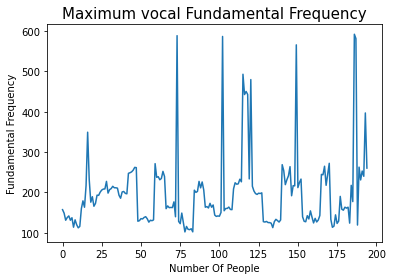

In [18]:
### plotting a graph for MDVP:Fhi(Hz) column
plt.plot(Parkinson_data['MDVP:Fhi(Hz)'])
plt.title('Maximum vocal Fundamental Frequency',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Fundamental Frequency',fontsize=10)
plt.show()

This means that most of the patient had high pitch voice 

### MDVP:Flo(Hz) (Minimum vocal Fundamental Frequency)

In [19]:
### various rows of the MDVP:Flo(Hz) column
Parkinson_data['MDVP:Flo(Hz)'].head()

0     74.997
1    113.819
2    111.555
3    111.366
4    110.655
Name: MDVP:Flo(Hz), dtype: float64

In [20]:
### the highest MDVP:Flo(Hz) value
Parkinson_data['MDVP:Flo(Hz)'].max()

239.17

239.17Hz is the highest recorded value for MDVP:Flo(Hz) (Minimum vocal Fundamental Frequency)


In [21]:
### average MDVP:Flo(Hz) value
Parkinson_data['MDVP:Flo(Hz)'].mean()

116.32463076923077

Most patients recorded 116.32463076923077Hz for MDVP:Flo(Hz)( Minimum vocal Fundamental Frequency)

In [22]:
### the smallest MDVP:Flo(Hz) value
Parkinson_data['MDVP:Flo(Hz)'].min()

65.476

65.476Hz is the lowest value recorded for MDVP:Flo(Hz) (Minimum vocal Fundamental Frequency)

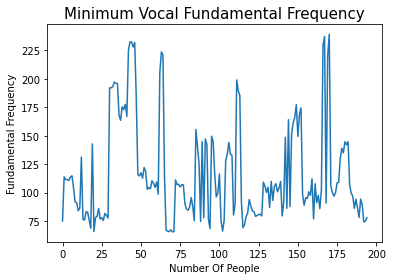

In [23]:
### plotting a graph for MDVP:Flo(Hz) column
plt.plot(Parkinson_data['MDVP:Flo(Hz)'])
plt.title('Minimum Vocal Fundamental Frequency',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Fundamental Frequency',fontsize=10)
plt.show()

Some of the patients recorded in this seesion had a deep voice and some had high  pitch voice 

### MDVP:Jitter(%) (Jitter In Percentage)

In [24]:
### various rows of the MDVP:jitter(%) column
Parkinson_data['MDVP:Jitter(%)'].head()

0    0.00784
1    0.00968
2    0.01050
3    0.00997
4    0.01284
Name: MDVP:Jitter(%), dtype: float64

In [25]:
### the highest MDVP:Jitter(%) value
Parkinson_data['MDVP:Jitter(%)'].max()

0.03316

0.03316 (0.033%) is the highest recorded value for MDVP:Jitter(%)(Jitter In Percentage)

In [26]:
### average MDVP:Jitter(%) value
Parkinson_data['MDVP:Jitter(%)'].mean()

0.006220461538461542

Most patients recorded 0.006220461538461542 (0.0062%) for MDVP:Jitter(%) (Jitter In Percentage)

In [27]:
### the smallest MDVP:Jitter(%) value
Parkinson_data['MDVP:Jitter(%)'].min()

0.00168

0.00168 (0.0017%) is the lowest value recorded for MDVP:Jitter(%) (Jitter In Percentage)

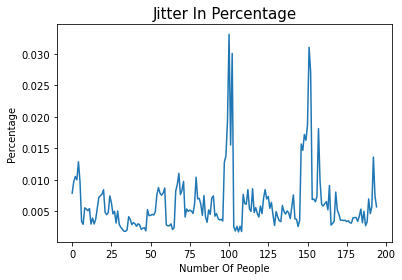

In [28]:
### plotting a graph for MDVP:jitter(%) column
plt.plot(Parkinson_data['MDVP:Jitter(%)'])
plt.title('Jitter In Percentage',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Percentage',fontsize=10)
plt.show()

The deviation in sound pulses in a high frequency of the patients recorded in percentages (%) were (3.3%) for maximum, (0.62%) for the average and (0.17%) for minimum.

### MDVP:Jitter(Abs) (Absolute Jitter In ms)

In [29]:
### various rows of the MDVP:Jitter(Abs) column
Parkinson_data['MDVP:Jitter(Abs)'].head()

0    0.00007
1    0.00008
2    0.00009
3    0.00009
4    0.00011
Name: MDVP:Jitter(Abs), dtype: float64

In [30]:
### the highest MDVP:Jitter(Abs) value
Parkinson_data['MDVP:Jitter(Abs)'].max()

0.00026

0.00026ms is the highest recorded value for MDVP:Jitter(Abs) (Absolute Jitter In ms)

In [31]:
### average MDVP:Jitter(Abs) value
Parkinson_data['MDVP:Jitter(Abs)'].mean()

4.395897435897438e-05

Most patients recorded 0.000044ms for MDVP:Jitter(Abs) (Absolute Jitter In ms)

In [32]:
### the smallest MDVP:Jitter(Abs) value
Parkinson_data['MDVP:Jitter(Abs)'].min()

7e-06

 0.000007ms is the lowest value recorded for MDVP:Jitter(Abs) (Absolute Jitter In ms)

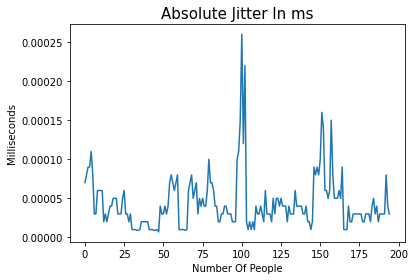

In [33]:
### plotting a graph for MDVP:Jitter(Abs) column
plt.plot(Parkinson_data['MDVP:Jitter(Abs)'])
plt.title('Absolute Jitter In ms',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Milliseconds',fontsize=10)
plt.show()

All the patients have a record of a good vocal quality since all have their jitter values below 30ms

### MDVP:RAP (Relative Amplitude Perturbation)	

In [34]:
### various rows of the MDVP:RAP column
Parkinson_data['MDVP:RAP'].head()

0    0.00370
1    0.00465
2    0.00544
3    0.00502
4    0.00655
Name: MDVP:RAP, dtype: float64

In [35]:
### the highest MDVP:RAP value
Parkinson_data['MDVP:RAP'].max()

0.02144

0.02144m is the highest recorded value for MDVP:RAP (Relative Amplitude Perturbation)

In [36]:
### average MDVP:RAP value
Parkinson_data['MDVP:RAP'].mean()

0.0033064102564102577

Most patients recorded 0.0033064102564102577m (0.0033m) for MDVP:RAP (Relative Amplitude Perturbation)

In [37]:
### the smallest MDVP:RAP value
Parkinson_data['MDVP:RAP'].min()

0.00068

0.00068m is the lowest value recorded for MDVP:RAP (Relative Amplitude Perturbation)

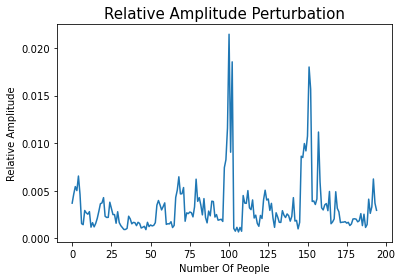

In [38]:
### plotting a graph for MDVP:RAP column
plt.plot(Parkinson_data['MDVP:RAP'])
plt.title('Relative Amplitude Perturbation',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Relative Amplitude',fontsize=10)
plt.show()

Recrded values of random cycle to cycle variability in amplitude of glottal pulses were (0.02144m) for maximum, (0.0033m) for the average and (0.00068m) for minimum.

### MDVP:PPQ (Five-Point Period Perturbation Quotient)

In [39]:
### various rows of the MDVP:PPQ column
Parkinson_data['MDVP:PPQ'].head()

0    0.00554
1    0.00696
2    0.00781
3    0.00698
4    0.00908
Name: MDVP:PPQ, dtype: float64

In [40]:
### the highest MDVP:PPQ value
Parkinson_data['MDVP:PPQ'].max()

0.01958

0.01958 is the highest recorded value for MDVP:PPQ (Five-Point Period Perturbation Quotient)

In [41]:
### average MDVP:PPQ value
Parkinson_data['MDVP:PPQ'].mean()

0.0034463589743589746

Most patients recorded 0.0034463589743589746 (0.00344) for MDVP:PPQ (Five-Point Period Perturbation Quotient)

In [42]:
### the smallest MDVP:PPQ value
Parkinson_data['MDVP:PPQ'].min()

0.00092

0.00092 is the lowest value recorded for MDVP:PPQ (Five-Point Period Perturbation Quotient)

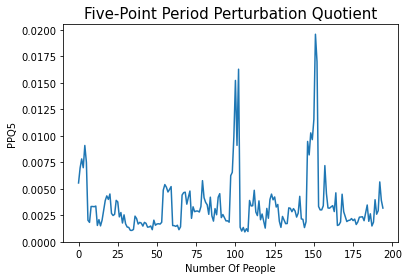

In [43]:
### plotting a graph for MDVP:PPQ column
plt.plot(Parkinson_data['MDVP:PPQ'])
plt.title('Five-Point Period Perturbation Quotient',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('PPQ5',fontsize=10)
plt.show()

The values recorded for the absolute average difference  between an interval and its average ,its four closest neighbours , divided by the average intervals  were (0.01958) for maximum, (0.00344) for the average and (0.00092) for minimum.

### Jitter:DDP (Average Absolute Difference Of Differences Between Jitter Cycles)

In [44]:
### various rows of the Jitter:DDPcolumn
Parkinson_data['Jitter:DDP'].head()

0    0.01109
1    0.01394
2    0.01633
3    0.01505
4    0.01966
Name: Jitter:DDP, dtype: float64

In [45]:
### the highest MDVP:PPQ value
Parkinson_data['MDVP:PPQ'].max()

0.01958

0.01958 is the highest recorded value for Jitter:DDP (Average Absolute Difference Of Differences Between Jitter Cycles)

In [46]:
### average Jitter:DDP value
Parkinson_data['Jitter:DDP'].mean()

0.009919948717948712

Most patients recorded 0.009919948717948712(0.01) for Jitter:DDP (Average Absolute Difference Of Differences Between Jitter Cycles)

In [47]:
### the smallest Jitter:DDP value
Parkinson_data['Jitter:DDP'].min()

0.00204

0.00204 is the lowest value recorded for Jitter:DDP (Average Absolute Difference Of Differences Between Jitter Cycles)

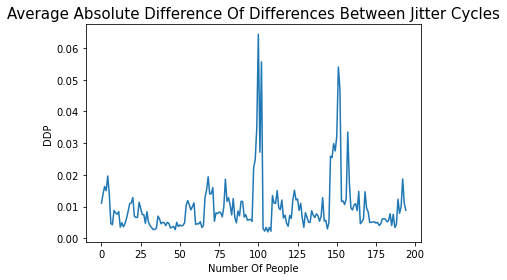

In [48]:
### plotting a graph for Jitter:DDP column
plt.plot(Parkinson_data['Jitter:DDP'])
plt.title('Average Absolute Difference Of Differences Between Jitter Cycles',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('DDP',fontsize=10)
plt.show()

The values recorded for the absolute average difference between consecutive differeences between periods,divided by the average period were (0.01958) for maximum, (0.01) for the average and (0.00204) for minimum.

### MDVP:Shimmer (Local Shimmer)

In [49]:
### various rows of the MDVP:Shimmer column
Parkinson_data['MDVP:Shimmer'].head()

0    0.04374
1    0.06134
2    0.05233
3    0.05492
4    0.06425
Name: MDVP:Shimmer, dtype: float64

In [50]:
### the highest MDVP:Shimmer value
Parkinson_data['MDVP:Shimmer'].max()

0.11908

0.11908 is the highest recorded value for MDVP:Shimmer (Local Shimmer)

In [51]:
### average MDVP:Shimmer value
Parkinson_data['MDVP:Shimmer'].mean()

0.0297091282051282

Most patients recorded 0.0297091282051282 (0.03) for MDVP:Shimmer (Local Shimmer)

In [52]:
### the smallest MDVP:Shimmer value
Parkinson_data['MDVP:Shimmer'].min()

0.00954

0.00954 is the lowest value recorded for MDVP:Shimmer (Local Shimmer)

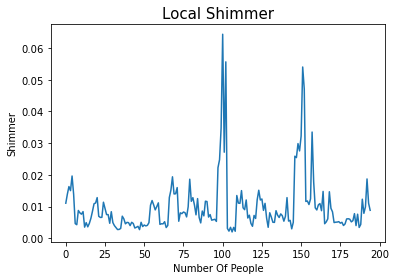

In [53]:
### plotting a graph for Jitter:DDP column
plt.plot(Parkinson_data['Jitter:DDP'])
plt.title('Local Shimmer',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Shimmer',fontsize=10)
plt.show()

The values recorded for the absolute average difference between the amplitudes of two consecutive periods, divided by the average amplitude were (0.11908) for maximum, (0.03) for the average and (0.00954) for minimum.

### MDVP:Shimmer(dB) (Local Shimmer In dB)

In [54]:
### various rows of the MDVP:Shimmer(dB) column
Parkinson_data['MDVP:Shimmer(dB)'].head()

0    0.426
1    0.626
2    0.482
3    0.517
4    0.584
Name: MDVP:Shimmer(dB), dtype: float64

In [55]:
### the highest MDVP:Shimmer(dB) value
Parkinson_data['MDVP:Shimmer(dB)'].max()

1.302

1.302dB is the highest recorded value for MDVP:Shimmer(dB) (Local Shimmer In dB)

In [56]:
### average MDVP:Shimmer(dB) value
Parkinson_data['MDVP:Shimmer(dB)'].mean()

0.2822512820512821

Most patients recorded 0.2822512820512821dB (0.28dB) for MDVP:Shimmer(dB) (Local Shimmer In dB)

In [57]:
### the smallest MDVP:Shimmer(dB) value
Parkinson_data['MDVP:Shimmer(dB)'].min()

0.085

0.085dB is the lowest value recorded for MDVP:Shimmer(dB) (Local Shimmer In dB)

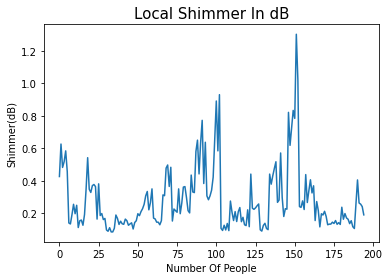

In [58]:
### plotting a graph for MDVP:Shimmer(dB) column
plt.plot(Parkinson_data['MDVP:Shimmer(dB)'])
plt.title('Local Shimmer In dB',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Shimmer(dB)',fontsize=10)
plt.show()

The values recorded for the absolute average difference of the base 10 logarithm of the diference between two consecutive  periods were (1.302dB) for maximum, (0.28dB) for the average and (0.085dB) for minimum.

### Shimmer:APQ3 (Three-Amplitude Perturbation Quotient)

In [59]:
### various rows of the Shimmer:APQ3 column
Parkinson_data['Shimmer:APQ3'].head()

0    0.02182
1    0.03134
2    0.02757
3    0.02924
4    0.03490
Name: Shimmer:APQ3, dtype: float64

In [60]:
### the highest Shimmer:APQ3value
Parkinson_data['Shimmer:APQ3'].max()

0.05647

0.05647 is the highest recorded value for Shimmer:APQ3 (Three-Point Period Perturbation Quotient)

In [61]:
### average Shimmer:APQ3 value
Parkinson_data['Shimmer:APQ3'].mean()

0.015664153846153845

Most patients recorded 0.015664153846153845(0.016) for Shimmer:APQ3 (Three-Point Period Perturbation Quotient)

In [62]:
### the smallest Shimmer:APQ3 value
Parkinson_data['Shimmer:APQ3'].min()

0.00455

0.00455 is the lowest value recorded for Shimmer:APQ3 (Three-Point Period Perturbation Quotient)

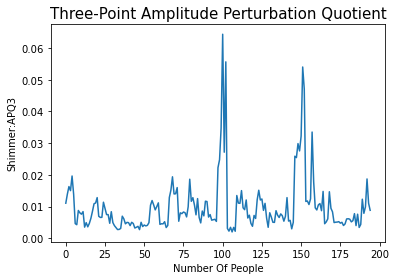

In [63]:
### plotting a graph for Shimmer:APQ3 column
plt.plot(Parkinson_data['Jitter:DDP'])
plt.title('Three-Point Amplitude Perturbation Quotient',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Shimmer:APQ3',fontsize=10)
plt.show()

The values recorded for the absolute average difference between the amplitude of a period and the average of the amplitudes of its neighbours , divided by the average amplitude were  (0.05647) for maximum, (0.016) for the average and (0.00455) for minimum.

### Shimmer:APQ5 (Shimmer:APQ3 (Five-Point Amplitude Perturbation Quotient))

In [64]:
### various rows of the Shimmer:APQ5 column
Parkinson_data['Shimmer:APQ5'].head()

0    0.03130
1    0.04518
2    0.03858
3    0.04005
4    0.04825
Name: Shimmer:APQ5, dtype: float64

In [65]:
### the highest Shimmer:APQ5 value
Parkinson_data['Shimmer:APQ5'].max()

0.0794

0.0794 is the highest recorded value for Shimmer:APQ5 (Shimmer:APQ3 (Five-Point Amplitude Perturbation Quotient))

In [66]:
### average Shimmer:APQ5 value
Parkinson_data['Shimmer:APQ5'].mean()

0.017878256410256418

Most patients recorded 0.017878256410256418 (0.0179) for Shimmer:APQ5 (Shimmer:APQ3 (Five-Point Amplitude Perturbation Quotient))

In [67]:
### the smallest Shimmer:APQ5 value
Parkinson_data['Shimmer:APQ5'].min()

0.0057

0.0057 is the lowest value recorded for Shimmer:APQ5 (Shimmer:APQ3 (Five-Point Amplitude Perturbation Quotient))

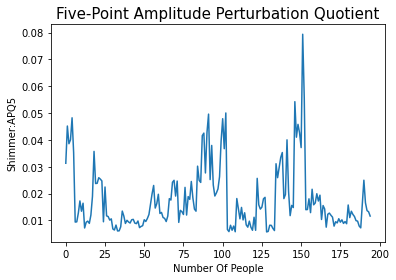

In [68]:
### plotting a graph for Shimmer:APQ5 column
plt.plot(Parkinson_data['Shimmer:APQ5'])
plt.title('Five-Point Amplitude Perturbation Quotient',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Shimmer:APQ5',fontsize=10)
plt.show()

The values recorded for the average absolute difference between the amplitude of a period and the average of the amplitudes of its fourclosest neighbours, divided by the average amplitude were (0.05647) for maximum, (0.016) for the average and (0.00455) for minimum.

### MDVP:APQ ( 11-Point Amplitude Perturbation Quotient)

In [69]:
### various rows of the MDVP:APQ column
Parkinson_data['MDVP:APQ'].head()

0    0.02971
1    0.04368
2    0.03590
3    0.03772
4    0.04465
Name: MDVP:APQ, dtype: float64

In [70]:
### the highest MDVP:APQ value
Parkinson_data['MDVP:APQ'].max()

0.13778

0.13778 is the highest recorded value for MDVP:APQ (11-Point Amplitude Perturbation Quotient)

In [71]:
### average MDVP:APQ value
Parkinson_data['MDVP:APQ'].mean()

0.02408148717948718

Most patients recorded 0.02408148717948718 (0.024) for MDVP:APQ (11-Point Amplitude Perturbation Quotient)

In [72]:
### the smallest MDVP:APQ value
Parkinson_data['MDVP:APQ'].min()

0.00719

0.00719 is the lowest value recorded for MDVP:APQ (11-Point Amplitude Perturbation Quotient)

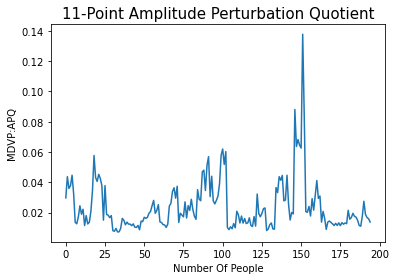

In [73]:
### plotting a graph for MDVP:APQ column
plt.plot(Parkinson_data['MDVP:APQ'])
plt.title('11-Point Amplitude Perturbation Quotient',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('MDVP:APQ',fontsize=10)
plt.show()

The values recorded for the average absolute difference between the amplitude of a period and the average of the amplitudes of its ten closest neighbours, divided by the average amplitude were (0.13778) for maximum, (0.00719) for the average and (0.00455) for minimum.

### Shimmer:DDA (Average Absolute Differences Between The Amplitude Of Consecutive Periods)

In [74]:
### various rows of the Shimmer:DDA column
Parkinson_data['Shimmer:DDA'].head()

0    0.06545
1    0.09403
2    0.08270
3    0.08771
4    0.10470
Name: Shimmer:DDA, dtype: float64

In [75]:
### the highest Shimmer:DDA value
Parkinson_data['Shimmer:DDA'].max()

0.16942

0.16942 is the highest recorded value for Shimmer:DDA (Average Absolute Differences Between The Amplitude Of Consecutive Periods)

In [76]:
### average Shimmer:DDA value
Parkinson_data['Shimmer:DDA'].mean()

0.04699261538461537

Most patients recorded 0.04699261538461537 (0.047) for Shimmer:DDA (Average Absolute Differences Between The Amplitude Of Consecutive Periods)

In [77]:
### the smallest Shimmer:DDAvalue
Parkinson_data['Shimmer:DDA'].min()

0.01364

0.01364 is the lowest value recorded for Shimmer:DDA (Average Absolute Differences Between The Amplitude Of Consecutive Periods)

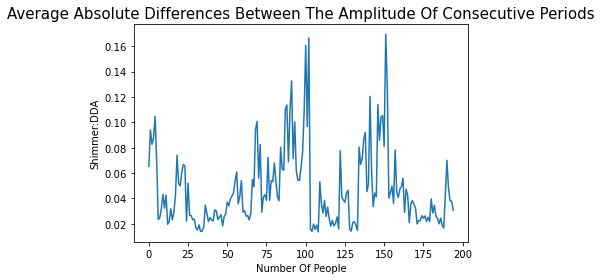

In [78]:
### plotting a graph for Shimmer:DDA column
plt.plot(Parkinson_data['Shimmer:DDA'])
plt.title('Average Absolute Differences Between The Amplitude Of Consecutive Periods',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('Shimmer:DDA',fontsize=10)
plt.show()

The values recorded for the average absolute differences between the amplitude of consecutive periods were (0.16942) for maximum, (0.047)) for the average and (0.01364) for minimum.

### NHR (Noise-To-Harmonics Ratio)

In [79]:
### various rows of the NHR column
Parkinson_data['NHR'].head()

0    0.02211
1    0.01929
2    0.01309
3    0.01353
4    0.01767
Name: NHR, dtype: float64

In [80]:
### the highest NHR value
Parkinson_data['NHR'].max()

0.31482

0.31482 is the highest recorded value for NHR (Noise-To-Harmonics Ratio)

In [81]:
### average NHR value
Parkinson_data['NHR'].mean()

0.024847076923076923

Most patients recorded 0.024847076923076923 (0.025) for NHR (Noise-To-Harmonics Ratio) 

In [82]:
### the smallest NHR value
Parkinson_data['NHR'].min()

0.00065

0.00065 is the lowest value recorded for NHR (Noise-To-Harmonics Ratio)

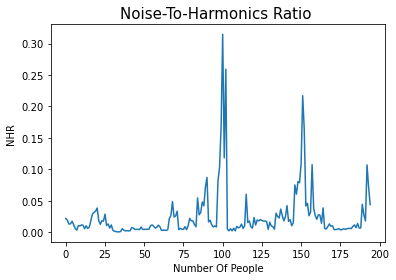

In [83]:
### plotting a graph for NHR column
plt.plot(Parkinson_data['NHR'])
plt.title('Noise-To-Harmonics Ratio ',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('NHR ',fontsize=10)
plt.show()

The values recorded for the measure of ratio between periodic and non-periodic components of a speech sounds were (0.31482) for maximum, (0.025) for the average and (0.00065) for minimum.

###  HNR (Harmonics-To-Noise Ratio)

In [84]:
### various rows of the HNR column
Parkinson_data['HNR'].head()

0    21.033
1    19.085
2    20.651
3    20.644
4    19.649
Name: HNR, dtype: float64

In [85]:
### the highest HNR value
Parkinson_data['HNR'].max()

33.047

33.047 is the highest recorded value for HNR (Harmonics-To-Noise Ratio)

In [86]:
### average HNR value
Parkinson_data['HNR'].mean()

21.885974358974366

Most patients recorded 21.885974358974366 (21.89) for HNR (Harmonics-To-Noise Ratio)

In [87]:
### the smallest HNR value
Parkinson_data['HNR'].min()

8.441

8.441 is the lowest value recorded for HNR (Harmonics-To-Noise Ratio)

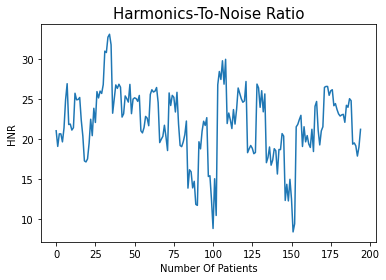

In [88]:
### plotting a graph for HNR column
plt.plot(Parkinson_data['HNR'])
plt.title('Harmonics-To-Noise Ratio',fontsize=15)
plt.xlabel('Number Of Patients',fontsize=10)
plt.ylabel('HNR',fontsize=10)
plt.show()

The values recorded for the measure 0f  ratio between periodic and non-periodic components of a speech sounds were (33.047) for maximum, (21.89) for the average and (8.441) for minimum.

### status

In [89]:
### various rows of the status column
Parkinson_data['status'].head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [90]:
### various rows of the status column
Parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

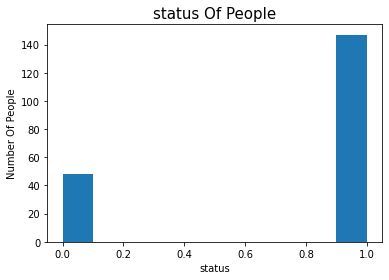

In [91]:
### plotting a graph for Shimmer:DDA column
plt.hist(Parkinson_data['status'])
plt.title('status Of People',fontsize=15)
plt.xlabel('status',fontsize=10)
plt.ylabel('Number Of People',fontsize=10)
plt.show()

Most of the people in the datasets are have Parkinson disease

### RPDE (Recurrence Period Density Entropy Measure)

In [92]:
### various rows of the RPDE column
Parkinson_data['RPDE'].head()

0    0.414783
1    0.458359
2    0.429895
3    0.434969
4    0.417356
Name: RPDE, dtype: float64

In [93]:
### the highest RPDE value
Parkinson_data['RPDE'].max()

0.685151

0.685151 is the highest recorded value for RPDE (Recurrence Period Density Entropy Measure)

In [94]:
### average RPDE  value
Parkinson_data['RPDE'].mean()

0.49853553846153836

Most patients recorded 0.49853553846153836 (0.5) for RPDE (Recurrence Period Density Entropy Measure)

In [95]:
### the smallest RPDE value
Parkinson_data['RPDE'].min()

0.25657

 is the lowest value recorded for RPDE (Recurrence Period Density Entropy Measure)

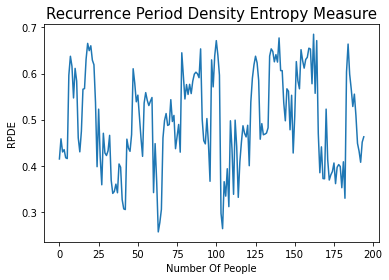

In [96]:
### plotting a graph for RPDE column
plt.plot(Parkinson_data['RPDE'])
plt.title('Recurrence Period Density Entropy Measure',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('RPDE',fontsize=10)
plt.show()

The values recorded for the repetitiveness of signlas for the dataset were (0.685151 ) for maximum, (0.5) for the average and (0.25657) for minimum.

### DFA (Signal Fractal Scaling Exponent Of Detrended Fluctuation Analysis)

In [97]:
### various rows of the DFA column
Parkinson_data['DFA'].head()

0    0.815285
1    0.819521
2    0.825288
3    0.819235
4    0.823484
Name: DFA, dtype: float64

In [98]:
### the highest DFA value
Parkinson_data['DFA'].max()

0.825288

0.825288 is the highest recorded value for DFA (Signal Fractal Scaling Exponent Of Detrended Fluctuation Analysis)

In [99]:
### average DFA value
Parkinson_data['DFA'].mean()

0.7180990461538465

Most patients recorded 0.7180990461538465 (0.72) for DFA (Signal Fractal Scaling Exponent Of Detrended Fluctuation Analysis)

In [100]:
### the smallest DFA value
Parkinson_data['DFA'].min()

0.574282

0.574282 is the lowest value recorded for DFA (Signal Fractal Scaling Exponent Of Detrended Fluctuation Analysis)

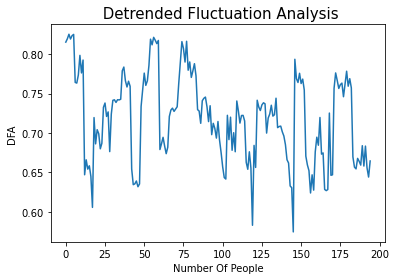

In [101]:
### plotting a graph for DFA column
plt.plot(Parkinson_data['DFA'])
plt.title(' Detrended Fluctuation Analysis',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('DFA',fontsize=10)
plt.show()

The values recorded for the method used to investigate long range correlation in non stationary series were (0.825288) for maximum, (0.72) for the average and (0.574282) for minimum.

### spread1 (Two Nonlinear Methods Of Fundamental)

In [102]:
### various rows of the spread1 column
Parkinson_data['spread1'].head()

0   -4.813031
1   -4.075192
2   -4.443179
3   -4.117501
4   -3.747787
Name: spread1, dtype: float64

In [103]:
### the highest spread1 value
Parkinson_data['spread1'].max()

-2.434031

-2.434031 is the highest recorded value for spread1 (Two Nonlinear Methods Of Fundamental)

In [104]:
### average spread1 value
Parkinson_data['spread1'].mean()

-5.684396743589743

Most patients recorded -5.684396743589743 (-5.7) for spread1 (Two Nonlinear Methods Of Fundamental)

In [105]:
### the smallest spread1 value
Parkinson_data['spread1'].min()

-7.964984

-7.964984 is the lowest value recorded for spread1 (Two Nonlinear Methods Of Fundamental)

plotting a graph for spread1 column


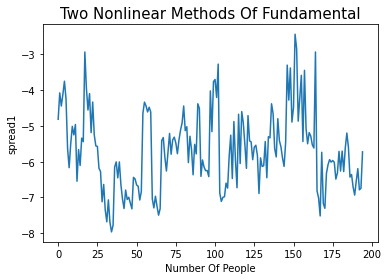

In [168]:
### plotting a graph for spread1 column
plt.plot(Parkinson_data['spread1'])
plt.title('Two Nonlinear Methods Of Fundamental',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('spread1',fontsize=10)
plt.show()

The values recorded for two nonlinear methods of fundamentals were (-2.434031) for maximum, (-5.7 for the average and (-7.964984) for minimum.

### spread2 (Frequency variation)

In [107]:
### various rows of the spread2 column
Parkinson_data['spread2'].head()

0    0.266482
1    0.335590
2    0.311173
3    0.334147
4    0.234513
Name: spread2, dtype: float64

In [108]:
### the highest spread2 value
Parkinson_data['spread2'].max()

0.450493

0.450493 is the highest recorded value for spread2 (Frequency variation)

In [109]:
### average spread2 value
Parkinson_data['spread2'].mean()

0.22651034871794856

Most patients recorded 0.22651034871794856 (0.23) for spread2 (Frequency variation)

In [110]:
### the smallest spread2 value
Parkinson_data['spread2'].min()

0.006274

0.006274 is the lowest value recorded for spread2 (Frequency variation)

 plotting a graph for spread2 column


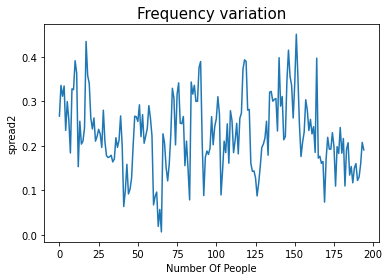

In [167]:
### plotting a graph for spread2 column
plt.plot(Parkinson_data['spread2'])
plt.title('Frequency variation',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('spread2',fontsize=10)
plt.show()

The values recorded for frequency variation were (0.450493) for maximum, (0.23) for the average and (0.006274) for minimum.

### D2 (Correlation Dimension)

In [112]:
### various rows of the D2 column
Parkinson_data['D2'].head()

0    2.301442
1    2.486855
2    2.342259
3    2.405554
4    2.332180
Name: D2, dtype: float64

In [113]:
### the highest D2 value
Parkinson_data['D2'].max()

3.671155

3.671155 is the highest recorded value for D2 (Correlation Dimension)

In [114]:
### average D2 value
Parkinson_data['D2'].mean()

2.3818260871794874

Most patients recorded 2.3818260871794874 (2.38) for D2 (Correlation Dimension)

In [115]:
### the smallest D2 value
Parkinson_data['D2'].min()

1.423287

1.423287 is the lowest value recorded for D2 (Correlation Dimension)

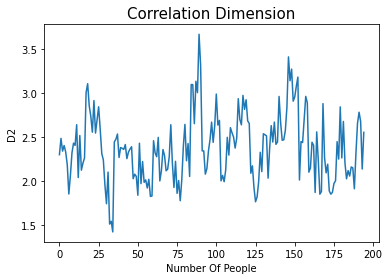

In [116]:
### plotting a graph for D2 column
plt.plot(Parkinson_data['D2'])
plt.title('Correlation Dimension',fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('D2',fontsize=10)
plt.show()

The values recorded for correlation dimension were (3.671155) for maximum, (2.38) for the average and (1.423287) for minimum.

###  PPE (Pitch Period Entropy)

In [117]:
### various rows of the PPE column
Parkinson_data['PPE'].head()

0    0.284654
1    0.368674
2    0.332634
3    0.368975
4    0.410335
Name: PPE, dtype: float64

In [118]:
### the highest PPE value
Parkinson_data['PPE'].max()

0.527367

0.527367 is the highest recorded value for PPE (Pitch Period Entropy)

In [119]:
### average PPE value
Parkinson_data['PPE'].mean()

0.20655164102564105

Most patients recorded 0.20655164102564105 (0.21) for PPE (Pitch Period Entropy)

In [120]:
### the smallest PPE value
Parkinson_data['PPE'].min()

0.044539

0.044539 is the lowest value recorded for PPE (Pitch Period Entropy)

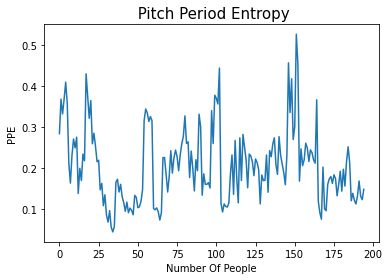

In [121]:
### plotting a graph for PPE column
plt.plot(Parkinson_data['PPE'])
plt.title(' Pitch Period Entropy' ,fontsize=15)
plt.xlabel('Number Of People',fontsize=10)
plt.ylabel('PPE',fontsize=10)
plt.show()

The values recorded for the robust measure sensitive to observed changes in speech specific to PD(Parkinson Disease) were (0.527367) for maximum, (0.21) for the average and (0.044539) for minimum.

## MULTIVARIATE ANALYSIS

In [122]:
Parkinson_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


### Parkinson_data.columns

In [123]:
new_data=Parkinson_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]

In [124]:
new_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### MDVP:Fo(Hz) AGAINST MDVP:Fhi(Hz) AND MDVP:Flo(Hz)

In [125]:
### loooking at MDVP:Fo(Hz),MDVP:Fhi(Hz) and MDVP:Flo(Hz) column
Parkinson_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']].head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz)
0,119.992,157.302,74.997
1,122.400,148.650,113.819
2,116.682,131.111,111.555
3,116.676,137.871,111.366
4,116.014,141.781,110.655


In [126]:
### loooking at the relationship MDVP:Fo(Hz),MDVP:Fhi(Hz) and MDVP:Flo(Hz) column
Parkinson_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']].corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz)
MDVP:Fo(Hz),1.000000,0.400985,0.596546
MDVP:Fhi(Hz),0.400985,1.000000,0.084951
MDVP:Flo(Hz),0.596546,0.084951,1.000000


MDVP:Fo(Hz)(Average Vocal Fundamental Frequency) has a medium relationship with MDVP:Fhi(Hz)(Maximum Vocal Fundamental Frequency ) and MDVP:Flo(Hz)(Maximum Vocal Fundamental Frequency), MDVP:Fhi(Hz) (Maximum Vocal Fundamental Frequency) has a very weak relationship between MDVP:Fo(Hz)(Average Vocal Fundamental Frequency) and MDVP:Flo(Hz)(Maximum Vocal Fundamental Frequency) 

### MDVP:Jitter(%) AGAINST MDVP:Jitter(Abs) AND Jitter:DDP

In [127]:
### loooking at MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:DDP column
Parkinson_data[['MDVP:Jitter(%)','MDVP:Jitter(Abs)','Jitter:DDP']].head()

,MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:DDP
0,0.00784,0.00007,0.01109
1,0.00968,0.00008,0.01394
2,0.01050,0.00009,0.01633
3,0.00997,0.00009,0.01505
4,0.01284,0.00011,0.01966


In [128]:
### loooking at the relationship between MDVP:Jitter(%),MDVP:Jitter(Abs) and Jitter:DDP column
Parkinson_data[['MDVP:Jitter(%)','MDVP:Jitter(Abs)','Jitter:DDP']].corr()

,MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:DDP
MDVP:Jitter(%),1.000000,0.935714,0.990276
MDVP:Jitter(Abs),0.935714,1.000000,0.922913
Jitter:DDP,0.990276,0.922913,1.000000


MDVP:Jitter(%)(Jitter in Percentage) has a very strong relationship MDVP:Jitter(Abs) (Absolute Jitter in ms) and Jitter:DDP (Difference Of Differences Between Jitter Cycles).

###  MDVP:RAP AGAINST MDVP:PPQ AND MDVP:APQ

In [129]:
### loooking at MDVP:RAP, MDVP:PPQ and MDVP:APQ column
Parkinson_data[['MDVP:RAP','MDVP:PPQ','MDVP:APQ']].head()

,MDVP:RAP,MDVP:PPQ,MDVP:APQ
0,0.00370,0.00554,0.02971
1,0.00465,0.00696,0.04368
2,0.00544,0.00781,0.03590
3,0.00502,0.00698,0.03772
4,0.00655,0.00908,0.04465


In [130]:
### loooking at the relationship MDVP:RAP, MDVP:PPQ and MDVP:APQ 
Parkinson_data[['MDVP:RAP','MDVP:PPQ','MDVP:APQ']].corr()

,MDVP:RAP,MDVP:PPQ,MDVP:APQ
MDVP:RAP,1.000000,0.957317,0.737455
MDVP:PPQ,0.957317,1.000000,0.804139
MDVP:APQ,0.737455,0.804139,1.000000


MDVP:RAP(Relative Amplitude Perturbation) has a very strong relationship between MDVP:PPQ (Five-Point Period Perturbation Quotient) and MDVP:APQ (Eleven Point Amplitude Perturbation Quotient)

### MDVP:Shimmer VS MDVP:Shimmer(dB) VS Shimmer:APQ3 VS Shimmer:APQ5 VSShimmer:DDA

In [131]:
### loooking at MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5 and Shimmer:DDA column
Parkinson_data[['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA']].head()

,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA
0,0.04374,0.426,0.02182,0.03130,0.06545
1,0.06134,0.626,0.03134,0.04518,0.09403
2,0.05233,0.482,0.02757,0.03858,0.08270
3,0.05492,0.517,0.02924,0.04005,0.08771
4,0.06425,0.584,0.03490,0.04825,0.10470


In [132]:
### loooking at the ralationship between MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5 and Shimmer:DDA 
Parkinson_data[['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA']].corr()

,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA
MDVP:Shimmer,1.000000,0.987258,0.987625,0.982835,0.987626
MDVP:Shimmer(dB),0.987258,1.000000,0.963198,0.973751,0.963202
Shimmer:APQ3,0.987625,0.963198,1.000000,0.960070,1.000000
Shimmer:APQ5,0.982835,0.973751,0.960070,1.000000,0.960072
Shimmer:DDA,0.987626,0.963202,1.000000,0.960072,1.000000


All the columns have a very strong relationship among each other with  correlation value from 0.9 to 1.0

### NHR  AGAINST HNR AND status

In [133]:
### loooking at NHR,HNR and status column
Parkinson_data[['NHR','HNR','status']].head()

,NHR,HNR,status
0,0.02211,21.033,1
1,0.01929,19.085,1
2,0.01309,20.651,1
3,0.01353,20.644,1
4,0.01767,19.649,1


In [134]:
### loooking at the realationship between NHR,HNR and status column
Parkinson_data[['NHR','HNR','status']].corr()

,NHR,HNR,status
NHR,1.000000,-0.714072,0.189429
HNR,-0.714072,1.000000,-0.361515
status,0.189429,-0.361515,1.000000


The status column has very weak relatioship between NHR(Noise To Harmonics Ratio) and HNR(Harmonics To Noise Ratio).NHR(Noise To Harmonics Ratio) and HNR(Harmonics To Noise Ratio) have a perfect negative relatioship between each other  

### RPDE VS DFA VS D2 VS  PPE

In [135]:
### loooking at RPDE,DFA,D2 and PPE column
Parkinson_data[['RPDE','DFA','D2','PPE']].head()

,RPDE,DFA,D2,PPE
0,0.414783,0.815285,2.301442,0.284654
1,0.458359,0.819521,2.486855,0.368674
2,0.429895,0.825288,2.342259,0.332634
3,0.434969,0.819235,2.405554,0.368975
4,0.417356,0.823484,2.332180,0.410335


In [136]:
### loooking at the relationship between RPDE,DFA,D2 and PPE column
Parkinson_data[['RPDE','DFA','D2','PPE']].corr()

,RPDE,DFA,D2,PPE
RPDE,1.000000,-0.110950,0.236931,0.545886
DFA,-0.110950,1.000000,-0.165381,0.270445
D2,0.236931,-0.165381,1.000000,0.480585
PPE,0.545886,0.270445,0.480585,1.000000


There is perfect negative correlation between RPDE(Recurrence Period Density Entropy Measure),DFA(Detrended Fluctuation Analysis) and D2(Correlation Dimension). There is a weak and medium correlation between PPE(Pitch Period Entropy),RPDE(Recurrence Period Density Entropy Measure),DFA(Detrended FluctuationAnalysis) and D2(Correlation Dimension)

### spread1 AGAINST spread2

In [137]:
### loooking at spread1 and spread2 column
Parkinson_data[['spread1','spread2']].head()

,spread1,spread2
0,-4.813031,0.266482
1,-4.075192,0.335590
2,-4.443179,0.311173
3,-4.117501,0.334147
4,-3.747787,0.234513


In [138]:
### loooking at  relationship between spread1 and spread2 column
Parkinson_data[['spread1','spread2']].corr()

,spread1,spread2
spread1,1.000000,0.652358
spread2,0.652358,1.000000


There is a strong correlation between spread1(Two Nonlinear Measures Of Fundamental)	and spread2(Frequency Variation)

# MACHINE LEARNING MODULE ANALYSIS

## LOGISTICREGRESSION MODEL

In [139]:
### focusing on this dataset for the LOGISTICREGRESSION MODEL
new_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [140]:
### using status column as our target 
y=new_data['status']

In [141]:
### dropping status column  
X=new_data.drop('status',axis=1)

In [142]:
### splitting the dataset into training and testing
X_train,X_test,y_train,y_test= train_test_split(X,y)

In [143]:
### using logisticRegression as the model
model = LogisticRegression()

In [144]:
### since the  model is empty,we need to fill it by training it,giving the model the questions and answers
model.fit(X_train,y_train)

C:\Users\USER\.docker\anacondapython docs\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
### giving the model the questions to predict the answers 
model.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1], dtype=int64)

In [146]:
y_test

177    1
4      1
112    1
30     0
105    1
190    0
3      1
7      1
80     1
57     1
120    1
37     1
83     1
133    1
66     1
151    1
135    1
62     0
175    0
160    1
69     1
58     1
20     1
50     0
191    0
87     1
35     0
116    1
46     0
161    1
107    1
184    0
41     1
68     1
126    1
137    1
136    1
124    1
48     0
45     0
106    1
121    1
85     1
33     0
12     1
109    1
182    1
14     1
49     0
Name: status, dtype: int64

In [147]:
### placing in an array
np.array(y_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0], dtype=int64)

In [148]:
### counting the predicted values and actual value and checking accuracy
accuracy_score(np.array(y_test),model.predict(X_test))

0.7959183673469388

## RANDOM FOREST

In [149]:
### focusing on this dataset for the RANDOM FOREST
new_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [150]:
### using status column as target
y=new_data['status']

In [151]:
### Dropping status column
x=new_data.drop('status',axis=1)

In [152]:
### splitting the dataset into training and testing
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size =0.3)

In [153]:
### using RandomForestClassifier as the model and using GAUSSIAN CLASSIFIER
model = RandomForestClassifier(n_estimators=100)

In [154]:
### Training the model using the trauning  sets
model.fit(x_train ,y_train)

RandomForestClassifier()

In [155]:
###### giving the model the questions to predict the answers 
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [156]:
### putting  test in an array
np.array(y_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [169]:
### counting the predicted values and actual value and checking accuracy
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8813559322033898


## DECISSION TREE

In [158]:
###  Looking at the various columns for DECISSIONTREE
new_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [159]:
### using status as the target
y=new_data['status']

In [160]:
### assigning all columns to 'y' and  dropping the status column 
x=new_data.drop('status',axis=1)

In [161]:
### splitting the dataset into training and testing
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size =0.3,random_state=1)

In [162]:
### using DECISSIONTREEClassifier as the model 
model =DecisionTreeClassifier()

In [163]:
### Training the model using the trauning the datasets
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [164]:
##### giving the model the questions to predict the answers 
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [165]:
### putting  test in an array
np.array(y_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [170]:
### counting the predicted values and actual value and checking accuracy
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8813559322033898
